In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("D:\\mini project\\tripadvisor_hotel_reviews.csv")

In [4]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [5]:
df.shape

(20491, 2)

## cleaning the data

In [6]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

In [7]:
df["Rating"].value_counts()

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

In [8]:
df_neg=df.loc[df["Rating"] < 3]
df_neg=df_neg.reset_index(drop=True)



In [9]:
df_five=df.loc[df["Rating"]==5]
df_five=df_five.reset_index(drop=True)

In [10]:
print(len(df_neg))

3214


In [11]:
print(len(df_five))

9054


In [12]:
df_pos=df_five.loc[:len(df_neg )]

In [13]:
len(df_pos)

3215

In [14]:
df_all=pd.concat([df_neg,df_pos],axis=0)
df_all=df_all.reset_index(drop=True)

In [15]:
len(df_all)

6429

In [16]:
df_all["Rating"]=np.where(df_all["Rating"]==5,'1','0')
df_all.head()

,Review,Rating
0,ok nothing special charge diamond member hilto...,0
1,"poor value stayed monaco seattle july, nice ho...",0
2,horrible customer service hotel stay february ...,0
3,disappointed say anticipating stay hotel monac...,0
4,great location need internally upgrade advanta...,0


In [17]:
df_all.tail()

,Review,Rating
6424,perfect hotel hotel does not really need glowi...,1
6425,perfect hotel small hotel comfortable perfect ...,1
6426,ordinary location extraordinary hotel know lov...,1
6427,"classy indulgence awesome experience, staff n'...",1
6428,first-rate experience stay library hotel wife ...,1


In [18]:
df_all=df_all.sample(frac=1)
df_all=df_all.reset_index(drop=True)
df_all.head(10)

,Review,Rating
0,"stayed better, hotel location ok building work...",0
1,fabulous resort family spent week beautiful pr...,1
2,friendly great location owners hotel extremely...,1
3,great air conditioning n't high priority list ...,0
4,beautiful hotels stayed rooms cruise serenade ...,1
5,disaapointing stay embasssy suites stayed emba...,0
6,quaint not rundown son decided celebrate gradu...,0
7,"unpleasant stay, l stayed pensione hotel recen...",0
8,food make sick 9 days suffering stayed dreams ...,0
9,"not best experiences, recommended owl hotel cl...",0


In [19]:
df_all['Rating'].value_counts()

Rating
1    3215
0    3214
Name: count, dtype: int64

In [20]:
df_all.head()

,Review,Rating
0,"stayed better, hotel location ok building work...",0
1,fabulous resort family spent week beautiful pr...,1
2,friendly great location owners hotel extremely...,1
3,great air conditioning n't high priority list ...,0
4,beautiful hotels stayed rooms cruise serenade ...,1


In [21]:
df_all['count_char']=df_all['Review'].apply(len)

In [22]:
df_all.head()

,Review,Rating,count_char
0,"stayed better, hotel location ok building work...",0,707
1,fabulous resort family spent week beautiful pr...,1,247
2,friendly great location owners hotel extremely...,1,351
3,great air conditioning n't high priority list ...,0,1319
4,beautiful hotels stayed rooms cruise serenade ...,1,449


In [23]:
df_all['count_word']=df_all['Review'].apply(lambda x :len(str(x).split()))

In [24]:
df_all.head()

,Review,Rating,count_char,count_word
0,"stayed better, hotel location ok building work...",0,707,108
1,fabulous resort family spent week beautiful pr...,1,247,33
2,friendly great location owners hotel extremely...,1,351,51
3,great air conditioning n't high priority list ...,0,1319,195
4,beautiful hotels stayed rooms cruise serenade ...,1,449,64


In [25]:
import nltk

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tanes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
df_all['count_sent']=df_all['Review'].apply(lambda x : len(nltk.sent_tokenize(str(x))))

In [28]:
df_all.head()

,Review,Rating,count_char,count_word,count_sent
0,"stayed better, hotel location ok building work...",0,707,108,1
1,fabulous resort family spent week beautiful pr...,1,247,33,1
2,friendly great location owners hotel extremely...,1,351,51,1
3,great air conditioning n't high priority list ...,0,1319,195,1
4,beautiful hotels stayed rooms cruise serenade ...,1,449,64,1


In [29]:
import re

In [30]:
df_all['Review'][0]

"stayed better, hotel location ok building work opposite did n't add view room, 10 mins passeig gracia, area n't particularly lively clean good bar opposite.stayed weds thurs fri night 2 nights week fine noise friday night atrium room street outside resulted 3 hours sleep, street outside meeting point local teenagers.room n't large modern photographs believe no drawers odd, no bathrobe slippers stated website free safe came handy.the hotel pool deserted barca n't warming nice outside space hotel summer, staff 2 surly female receptionists did n't eat restaurant breakfast prices extortionate, price paid night expected better standard hotel certainly not 4 star hotel, 3 star realistic rating, wo n't,  "

In [31]:
r1=re.sub('[^a-zA-Z]',' ',df_all['Review'][0])

In [32]:
r1

'stayed better  hotel location ok building work opposite did n t add view room     mins passeig gracia  area n t particularly lively clean good bar opposite stayed weds thurs fri night   nights week fine noise friday night atrium room street outside resulted   hours sleep  street outside meeting point local teenagers room n t large modern photographs believe no drawers odd  no bathrobe slippers stated website free safe came handy the hotel pool deserted barca n t warming nice outside space hotel summer  staff   surly female receptionists did n t eat restaurant breakfast prices extortionate  price paid night expected better standard hotel certainly not   star hotel    star realistic rating  wo n t   '

In [33]:
r1 = r1.lower()

In [34]:
r1

'stayed better  hotel location ok building work opposite did n t add view room     mins passeig gracia  area n t particularly lively clean good bar opposite stayed weds thurs fri night   nights week fine noise friday night atrium room street outside resulted   hours sleep  street outside meeting point local teenagers room n t large modern photographs believe no drawers odd  no bathrobe slippers stated website free safe came handy the hotel pool deserted barca n t warming nice outside space hotel summer  staff   surly female receptionists did n t eat restaurant breakfast prices extortionate  price paid night expected better standard hotel certainly not   star hotel    star realistic rating  wo n t   '

In [35]:
r1 = r1.split()

In [36]:
r1

['stayed',
 'better',
 'hotel',
 'location',
 'ok',
 'building',
 'work',
 'opposite',
 'did',
 'n',
 't',
 'add',
 'view',
 'room',
 'mins',
 'passeig',
 'gracia',
 'area',
 'n',
 't',
 'particularly',
 'lively',
 'clean',
 'good',
 'bar',
 'opposite',
 'stayed',
 'weds',
 'thurs',
 'fri',
 'night',
 'nights',
 'week',
 'fine',
 'noise',
 'friday',
 'night',
 'atrium',
 'room',
 'street',
 'outside',
 'resulted',
 'hours',
 'sleep',
 'street',
 'outside',
 'meeting',
 'point',
 'local',
 'teenagers',
 'room',
 'n',
 't',
 'large',
 'modern',
 'photographs',
 'believe',
 'no',
 'drawers',
 'odd',
 'no',
 'bathrobe',
 'slippers',
 'stated',
 'website',
 'free',
 'safe',
 'came',
 'handy',
 'the',
 'hotel',
 'pool',
 'deserted',
 'barca',
 'n',
 't',
 'warming',
 'nice',
 'outside',
 'space',
 'hotel',
 'summer',
 'staff',
 'surly',
 'female',
 'receptionists',
 'did',
 'n',
 't',
 'eat',
 'restaurant',
 'breakfast',
 'prices',
 'extortionate',
 'price',
 'paid',
 'night',
 'expected',
 

In [37]:
from nltk.corpus import stopwords

In [38]:
all_stopwords=stopwords.words("english")

In [39]:
all_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [40]:
r1 = [word for word in r1 if word not in set(all_stopwords)]

In [41]:
r1

['stayed',
 'better',
 'hotel',
 'location',
 'ok',
 'building',
 'work',
 'opposite',
 'n',
 'add',
 'view',
 'room',
 'mins',
 'passeig',
 'gracia',
 'area',
 'n',
 'particularly',
 'lively',
 'clean',
 'good',
 'bar',
 'opposite',
 'stayed',
 'weds',
 'thurs',
 'fri',
 'night',
 'nights',
 'week',
 'fine',
 'noise',
 'friday',
 'night',
 'atrium',
 'room',
 'street',
 'outside',
 'resulted',
 'hours',
 'sleep',
 'street',
 'outside',
 'meeting',
 'point',
 'local',
 'teenagers',
 'room',
 'n',
 'large',
 'modern',
 'photographs',
 'believe',
 'drawers',
 'odd',
 'bathrobe',
 'slippers',
 'stated',
 'website',
 'free',
 'safe',
 'came',
 'handy',
 'hotel',
 'pool',
 'deserted',
 'barca',
 'n',
 'warming',
 'nice',
 'outside',
 'space',
 'hotel',
 'summer',
 'staff',
 'surly',
 'female',
 'receptionists',
 'n',
 'eat',
 'restaurant',
 'breakfast',
 'prices',
 'extortionate',
 'price',
 'paid',
 'night',
 'expected',
 'better',
 'standard',
 'hotel',
 'certainly',
 'star',
 'hotel',
 '

In [42]:
from nltk.stem.porter import PorterStemmer

In [43]:
ps = PorterStemmer()

In [44]:
r1 = [ps.stem(word) for word in r1]

In [45]:
r1=" ".join(r1)

In [46]:
r1

'stay better hotel locat ok build work opposit n add view room min passeig gracia area n particularli live clean good bar opposit stay wed thur fri night night week fine nois friday night atrium room street outsid result hour sleep street outsid meet point local teenag room n larg modern photograph believ drawer odd bathrob slipper state websit free safe came handi hotel pool desert barca n warm nice outsid space hotel summer staff surli femal receptionist n eat restaur breakfast price extortion price paid night expect better standard hotel certainli star hotel star realist rate wo n'

In [47]:
import re
custom_stopwords = {'don',"don't",'ain','aren',"aren't",'couldn',"couldn't",'didn',"didn't",'doesn',"doesn't",'hadn',"hadn't",'hasn',"hasn't",'haven',"haven't",'isn',"isn't",'ma','mightn',"mightn't",'mustn',"mustn't",'needn',"needn't",'shan',"shan't",'no','nor','not','shouldn',"shouldn't",'wasn',"wasn't",'weren',"weren't",'won',"won't",'wouldn',"wouldn't"}
corpus=[]
ps=PorterStemmer()
stop_words=set(stopwords.words("english")) - custom_stopwords

for i in range(len(df_all)):
    r1=re.sub('[^a-zA-Z]',' ',df_all['Review'][i])
    r1 = r1.lower()
    r1 = r1.split()
    r1 = [ps.stem(word) for word in r1 if word not in stop_words]
    r1 = " ".join(r1)
    corpus.append(r1)
    

In [48]:
df_all['clean_word']=corpus

In [49]:
df_all.head()

,Review,Rating,count_char,count_word,count_sent,clean_word
0,"stayed better, hotel location ok building work...",0,707,108,1,stay better hotel locat ok build work opposit ...
1,fabulous resort family spent week beautiful pr...,1,247,33,1,fabul resort famili spent week beauti properti...
2,friendly great location owners hotel extremely...,1,351,51,1,friendli great locat owner hotel extrem friend...
3,great air conditioning n't high priority list ...,0,1319,195,1,great air condit n high prioriti list stay jia...
4,beautiful hotels stayed rooms cruise serenade ...,1,449,64,1,beauti hotel stay room cruis serenad sea thank...


In [50]:
X=df_all['clean_word'].values
y=df_all['Rating'].values

In [51]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [52]:
X_train.shape,X_test.shape

((5143,), (1286,))

### model building and testing

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

In [55]:
cv = CountVectorizer(max_features=2000)

In [56]:
X=cv.fit_transform(corpus).toarray()

In [57]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [58]:
X.shape

(6429, 2000)

In [59]:
y = df_all['Rating']

In [60]:
y

0       0
1       1
2       1
3       0
4       1
       ..
6424    0
6425    1
6426    0
6427    0
6428    0
Name: Rating, Length: 6429, dtype: object

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [63]:
from sklearn.naive_bayes import GaussianNB

In [64]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
accuracy_score(y_test,y_pred)

0.8716951788491446

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)


0.9339035769828927

In [68]:
from sklearn.svm import SVC
svm=RandomForestClassifier()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
accuracy_score(y_test,y_pred)

0.9362363919129082

In [69]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test,y_pred)


0.9517884914463453

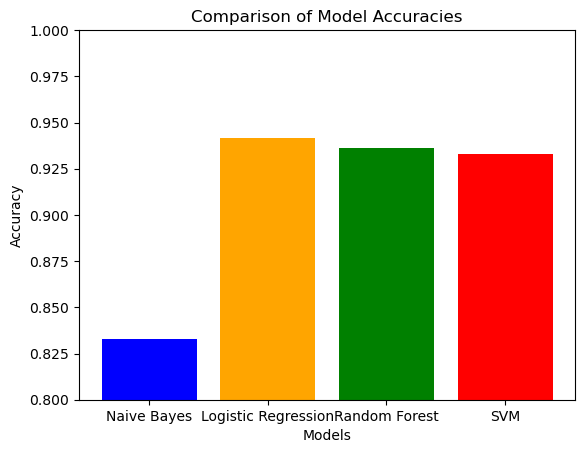

In [70]:
import matplotlib.pyplot as plt

# Accuracy scores of the models
accuracy_scores = {
    'Naive Bayes': 0.8328149300155521,
    'Logistic Regression': 0.9416796267496111,
    'Random Forest': 0.9362363919129082,
    'SVM': 0.9331259720062208
}

# Plotting the accuracies
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0.8, 1.0)  
plt.show()


In [71]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

custom_stopwords = {'don',"don't",'ain','aren',"aren't",'couldn',"couldn't",'didn',"didn't",'doesn',"doesn't",'hadn',"hadn't",'hasn',"hasn't",'haven',"haven't",'isn',"isn't",'ma','mightn',"mightn't",'mustn',"mustn't",'needn',"needn't",'shan',"shan't",'no','nor','not','shouldn',"shouldn't",'wasn',"wasn't",'weren',"weren't",'won',"won't",'wouldn',"wouldn't"}
corpus=[]
ps=PorterStemmer()
stop_words=set(stopwords.words("english")) - custom_stopwords

for i in range(len(df_all)):
    r1=re.sub('[^a-zA-Z]',' ',df_all['Review'][i])
    r1 = r1.lower()
    r1 = r1.split()
    r1 = [ps.stem(word) for word in r1 if word not in stop_words]
    r1 = " ".join(r1)
    corpus.append(r1)
    
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2000)
X=cv.fit_transform(corpus).toarray()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)


lr = LogisticRegression(random_state=42)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)



0.9517884914463453


In [72]:
import pickle

with open('LogisticRegression.pkl', 'wb') as f:
    pickle.dump(lr, f)



In [73]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2000)
X=cv.fit_transform(corpus).toarray()
X
X.shape
y = df_all['Rating']
y

0       0
1       1
2       1
3       0
4       1
       ..
6424    0
6425    1
6426    0
6427    0
6428    0
Name: Rating, Length: 6429, dtype: object

In [74]:
import pickle

with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(cv, f)